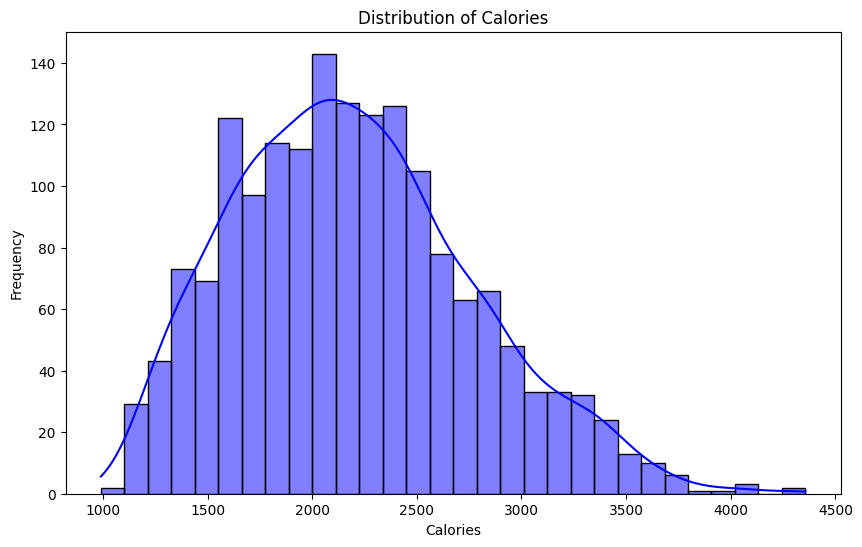

T-Test Results (Calories - Vegan vs Omnivore): T-Statistic = -3.1438, P-Value = 0.0017
ANOVA Results (Sugar - Across Activity Levels): F-Statistic = 81.7598, P-Value = 0.0000
Correlation between Weight and Daily Calorie Target: Correlation Coefficient = 0.2879, P-Value = 0.0000


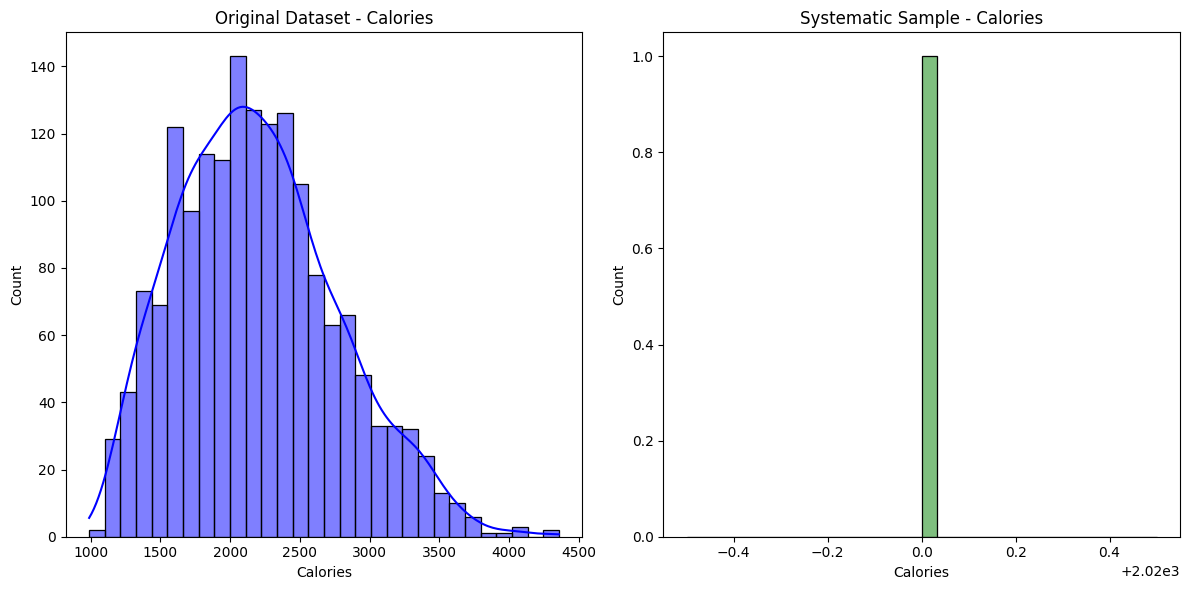

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, pearsonr
import pandas as pd  # Import pandas for data manipulation
import numpy as np

# Load your dataset here - replace 'your_dataset.csv' with the actual file path
data = pd.read_csv('Food_and_Nutrition__.csv')

# Step 1: EDA - Distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(data['Calories'], bins=30, kde=True, color='blue')
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

#  Step 2: Compare Calories for Two Dietary Preferences (T-Test)
vegan = data[data['Dietary Preference'] == 'Vegan']['Calories']
omnivore = data[data['Dietary Preference'] == 'Omnivore']['Calories']
t_stat, p_value_t = ttest_ind(vegan, omnivore)
print(f"T-Test Results (Calories - Vegan vs Omnivore): T-Statistic = {t_stat:.4f}, P-Value = {p_value_t:.4f}")

# Step 3: ANOVA for Sugar Levels Across Activity Levels
sugar_levels = [data[data['Activity Level'] == level]['Sugar'] for level in data['Activity Level'].unique()]
f_stat, p_value_anova = f_oneway(*sugar_levels)
print(f"ANOVA Results (Sugar - Across Activity Levels): F-Statistic = {f_stat:.4f}, P-Value = {p_value_anova:.4f}")

# Step 4: Correlation between Weight and Daily Calorie Target
corr, p_value_corr = pearsonr(data['Weight'], data['Daily Calorie Target'])
print(f"Correlation between Weight and Daily Calorie Target: Correlation Coefficient = {corr:.4f}, P-Value = {p_value_corr:.4f}")

# Step 5: Systematic Sampling (20%)
def systematic_sampling(data, percentage):
    step = int(1 / percentage * len(data))
    indices = np.arange(0, len(data), step)
    return data.iloc[indices]

systematic_sample = systematic_sampling(data, percentage=0.2)

# Compare Original vs Sampled Data
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
sns.histplot(data['Calories'], bins=30, kde=True, color='blue')
plt.title("Original Dataset - Calories")
plt.xlabel("Calories")

# Systematic Sample
plt.subplot(1, 2, 2)
sns.histplot(systematic_sample['Calories'], bins=30, kde=True, color='green')
plt.title("Systematic Sample - Calories")
plt.xlabel("Calories")

plt.tight_layout()
plt.show()